# Importações Necessárias

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import os

In [19]:
def exibir_imagens(imagens_originais, imagens_filtradas, titulo_filtro):
    """Exibe pares de imagens originais e filtradas lado a lado."""
    total = len(imagens_originais)
    plt.figure(figsize=(12, 6 * total / 2))

    for i, (orig, filtrada) in enumerate(zip(imagens_originais, imagens_filtradas)):
        plt.subplot(total, 2, 2 * i + 1)
        plt.imshow(orig)
        plt.title(f"Imagem {i+1} Original")
        plt.xticks([]), plt.yticks([])

        plt.subplot(total, 2, 2 * i + 2)
        plt.imshow(filtrada)
        plt.title(f"Imagem {i+1} - {titulo_filtro}")
        plt.xticks([]), plt.yticks([])

    plt.show()

# MÉDIA

In [3]:
h1 = 1/9 * np.ones((3,3),dtype='int')
h2 = 1/25 * np.ones((5,5),dtype='int')
h3 = 1/49 * np.ones((7,7),dtype='int')
h4 = 1/255 * np.ones((15,15),dtype='int')

Digite o tamanho do filtro (número inteiro positivo): 12


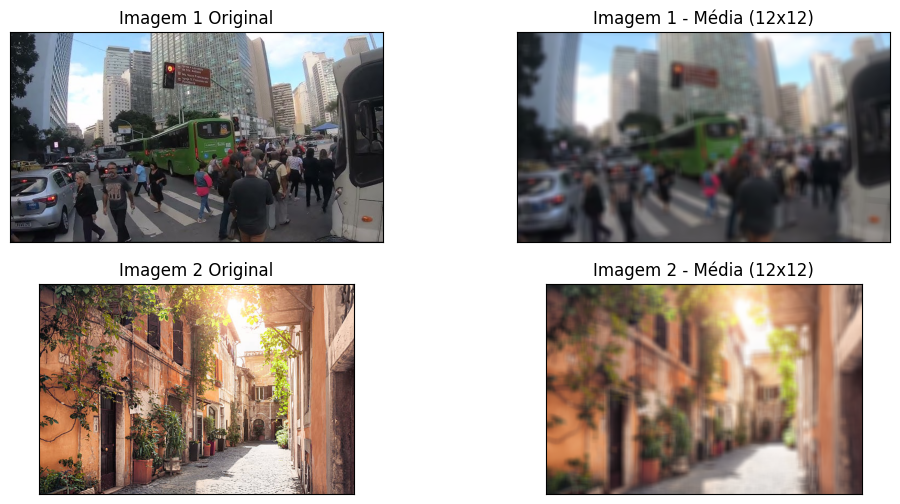

In [16]:
image_paths = ['/content/media.jpg', '/content/media2.jpg']

try:
    imagens = []
    for path in image_paths:
        if not os.path.exists(path):
            raise FileNotFoundError(f"❌ Arquivo não encontrado: {path}")

        img = cv2.imread(path)
        if img is None:
            raise ValueError(f"❌ Erro ao ler a imagem: {path}")

        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        except cv2.error as e:
            raise ValueError(f"❌ Falha na conversão de cores ({path})") from e

        imagens.append(img)

    try:
        filtro = int(input("Digite o tamanho do filtro (número inteiro positivo): "))
        if filtro <= 0:
            raise ValueError("O tamanho do filtro deve ser positivo.")
    except ValueError:
        raise ValueError("❌ Entrada inválida. Digite um número inteiro positivo.")

    filtradas = [cv2.blur(img, (filtro, filtro)) for img in imagens]

    exibir_imagens(imagens, filtradas, f"Média ({filtro}x{filtro})")

except Exception as e:
    print(f"⚠️ Ocorreu um erro: {e}")

# MEDIANA



Digite o tamanho do filtro (ímpar e positivo): 5


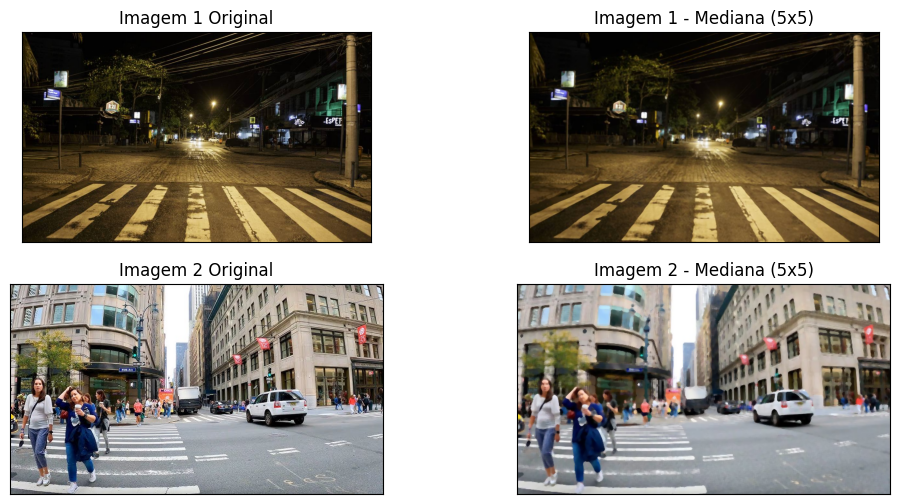

In [18]:
image_paths = ['/content/mediana.jpg', '/content/mediana2.jpg']

try:
    imagens = []
    for path in image_paths:
        if not os.path.exists(path):
            raise FileNotFoundError(f"❌ Arquivo não encontrado: {path}")

        img = cv2.imread(path)
        if img is None:
            raise ValueError(f"❌ Erro ao ler a imagem: {path}")

        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        except cv2.error as e:
            raise ValueError(f"❌ Falha na conversão de cores ({path})") from e

        imagens.append(img)

    try:
        filtro = int(input("Digite o tamanho do filtro (ímpar e positivo): "))
        if filtro <= 0 or filtro % 2 == 0:
            raise ValueError("O filtro deve ser um número inteiro ímpar e positivo.")
    except ValueError:
        raise ValueError("❌ Entrada inválida. Digite um número inteiro ímpar e positivo.")

    filtradas = [cv2.medianBlur(img, filtro) for img in imagens]

    exibir_imagens(imagens, filtradas, f"Mediana ({filtro}x{filtro})")

except Exception as e:
    print(f"⚠️ Ocorreu um erro: {e}")